In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
# distutils error so we used pip install setuptools
import pandas_datareader as data


In [109]:
# Fetch data

df = yf.download("AAPL", start="2010-01-01", end="2024-12-31")
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470742,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481930,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409361,447610800


In [110]:

df=df.reset_index() 
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470742,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481930,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409361,447610800


In [111]:
#drop date and adj close as not necessary 
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


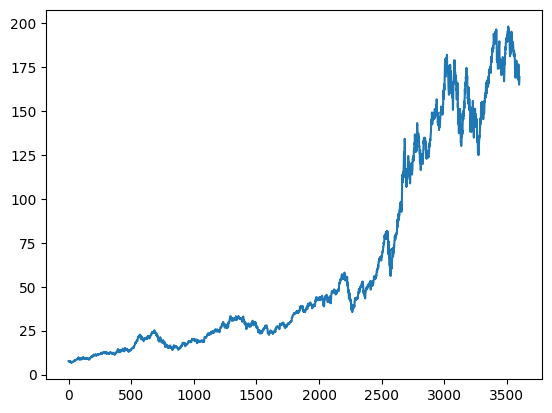

In [112]:
plt.plot(df.Close)

In [113]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3597,166.210007,166.399994,164.080002,165.000000,67772100
3598,165.520004,167.259995,164.770004,165.839996,48116400
3599,165.350006,167.050003,164.919998,166.899994,49537800
3600,166.539993,169.300003,166.210007,169.020004,48121300


In [114]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3597    182.8385
3598    182.5990
3599    182.3640
3600    182.1605
3601    181.9531
Name: Close, Length: 3602, dtype: float64

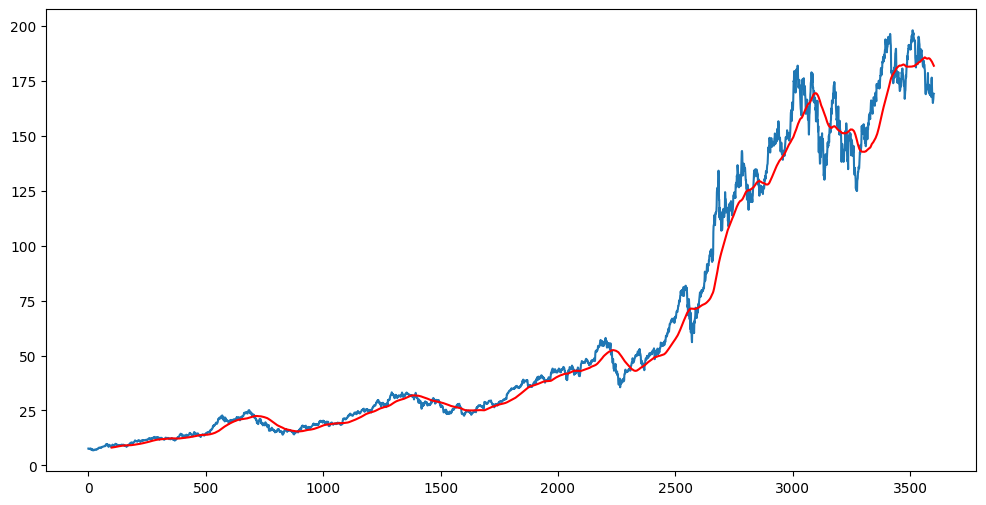

In [115]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [116]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3597    182.19970
3598    182.06985
3599    181.95095
3600    181.85300
3601    181.75865
Name: Close, Length: 3602, dtype: float64

(3602, 5)

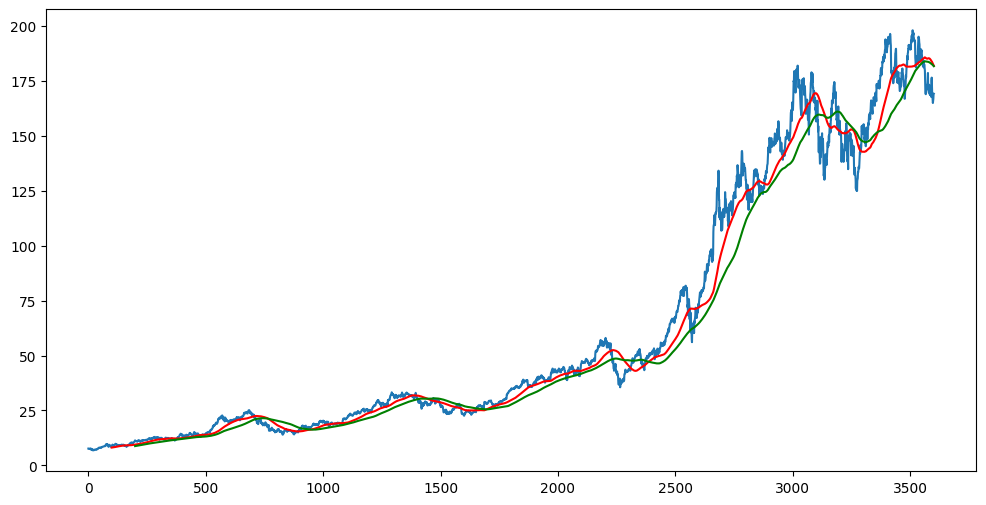

In [117]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
df.shape

In [118]:
#splitting Data into Training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int (len(df))])
print(data_training.shape)
print(data_testing.shape)

(2521, 1)
(1081, 1)


In [119]:
  data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [120]:
data_testing.head()

,Close
2521,77.407501
2522,77.582497
2523,79.239998
2524,78.169998
2525,77.834999


In [121]:
#after dividing data into training and testing we are 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [122]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01137658],
       [0.01156826],
       [0.00980168],
       ...,
       [0.98770639],
       [0.98259324],
       [1.        ]])

In [123]:
data_training_array.shape

(2521, 1)

In [124]:
x_train= []
y_train= []
for i in range(100,data_training.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train ,y_train =  np.array(x_train), np.array(y_train)

In [125]:
x_train.shape

(2421, 100, 1)

In [128]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [129]:
model=Sequential()
model.add(LSTM(units=50,activation ='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation ='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation ='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation ='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [130]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 22s 194ms/step - loss: 0.0460
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - loss: 0.0053
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - loss: 0.0046
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - loss: 0.0043
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 192ms/step - loss: 0.0045
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 191ms/step - loss: 0.0032
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 192ms/step - loss: 0.0034
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - loss: 0.0026
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - loss: 0.0027
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - loss: 0.0026
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - loss: 0.0029
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - loss: 0.0024
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - loss: 0.0027
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - loss: 0.0022
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [134]:
model.save('keras_model.keras')


In [135]:
data_testing.head()

,Close
2521,77.407501
2522,77.582497
2523,79.239998
2524,78.169998
2525,77.834999


In [136]:
data_training.tail(100)

,Close
2421,51.625000
2422,52.587502
2423,52.590000
2424,53.160000
2425,53.115002
...,...
2516,75.087502
2517,74.357498
2518,74.949997
2519,74.597504


In [137]:
past_100_days= data_training.tail(100)
past_100_days

,Close
2421,51.625000
2422,52.587502
2423,52.590000
2424,53.160000
2425,53.115002
...,...
2516,75.087502
2517,74.357498
2518,74.949997
2519,74.597504


In [138]:
# final_df = past_100_days.append(data_testing, ignore_index=True)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [139]:
final_df.head()

,Close
0,51.625000
1,52.587502
2,52.590000
3,53.160000
4,53.115002


In [140]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00654459],
       [0.01307224],
       [0.01308918],
       ...,
       [0.78833498],
       [0.80271281],
       [0.8040014 ]])

In [141]:
input_data.shape

(1181, 1)

In [142]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [143]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1081, 100, 1)
(1081,)


In [144]:
#making prediction
y_predicted=model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step


In [145]:
y_test


array([0.18140048, 0.1825873 , 0.1938284 , ..., 0.78833498, 0.80271281,
       0.8040014 ])

In [146]:
y_predicted

array([[0.1945469 ],
       [0.1972703 ],
       [0.20007183],
       ...,
       [0.7672785 ],
       [0.75996923],
       [0.7522973 ]], dtype=float32)

In [147]:
scaler.scale_

array([0.00678196])

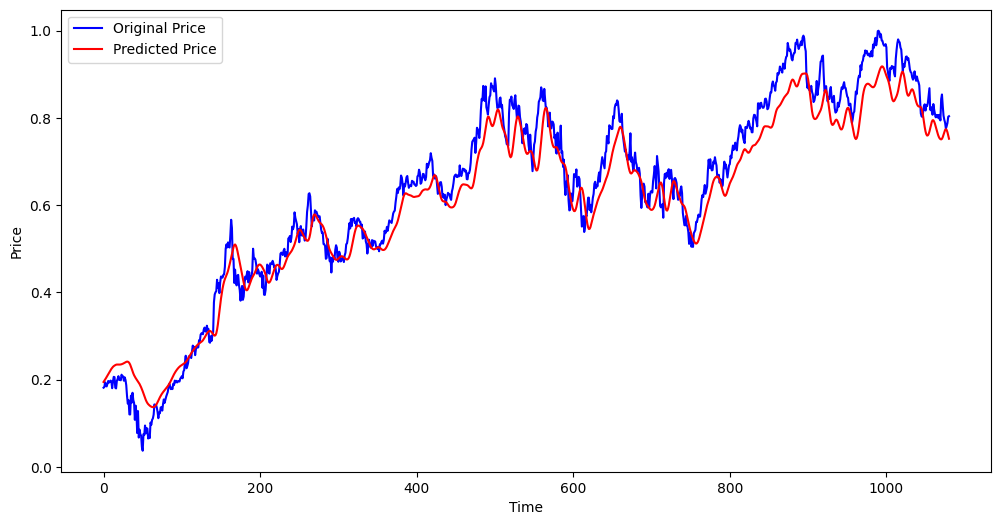

In [148]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()                                                               